#Detecting Hate Speech in Darija Tweets:

A Comprehensive Machine Learning Approach with SVM, KNN, Logistic Regression, and Passive Aggressive Classifier

Data Preprocessing and Preparation
Data Cleaning:already cleaned the data from regular expressions and emojis in "data_cleaned.csv"

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/HateSpeechData/data_cleaned.csv')

X = df['clean_tweet']  # Features
y = df['label']  # Labels

# using TF-IDF vectorization in SVM , KNN and LOGREF

In [3]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction
X_train = X_train.fillna('')  # Replace NaN values with an empty string
X_test = X_test.fillna('')

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



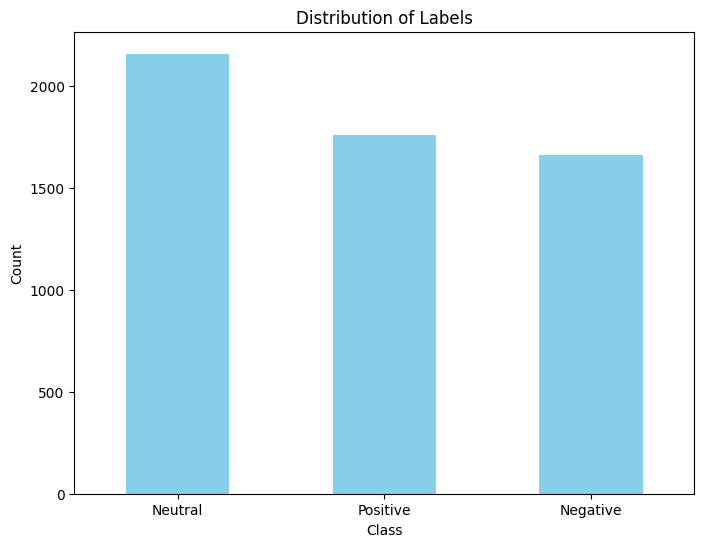

In [34]:
import matplotlib.pyplot as plt

class_names = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}

# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Replace numeric labels with class names
class_counts.index = class_counts.index.map(class_names)

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


### SVM MODEL

In [6]:
# Model training
# Initialize and train the SVM model

#svm_model = svm.SVC(kernel='poly', degree=3, C=1)
# Reduce the batch size for processing the embeddings

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Model evaluation
# Make predictions on the testing set
y_pred = svm_model.predict(X_test_tfidf)



In [7]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6956132497761862

Confusion Matrix:
[[244  56  56]
 [ 37 360  34]
 [ 67  90 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       356
           1       0.71      0.84      0.77       431
           2       0.66      0.52      0.58       330

    accuracy                           0.70      1117
   macro avg       0.69      0.68      0.68      1117
weighted avg       0.69      0.70      0.69      1117



In [8]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
              'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
              'kernel': ['linear', 'rbf']}  # Kernel type


# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the testing set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_tfidf)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [9]:
from sklearn.metrics import accuracy_score

# Evaluate the best model on the testing set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7224709042076992


### cell use for testing the predcition for SVM

In [23]:
#Prediction
# Example of making predictions on new data
new_tweet = ["واكواك الحق على دولة"]
new_tweet_tfidf = vectorizer.transform(new_tweet)
predicted_class = best_svm_model.predict(new_tweet_tfidf)
print("\nPredicted Class:", predicted_class)


Predicted Class: [2]


In [15]:
from joblib import dump

# Save the best SVM model to a file
dump(best_svm_model, '/content/drive/My Drive/HateSpeechData/best_svm_model.joblib')

['/content/drive/My Drive/HateSpeechData/best_svm_model.joblib']

### KNN model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [16]:
# Model training
# Initialize and train the KNN model
k = 3  # Number of neighbors to consider, you can adjust this value
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_tfidf, y_train)

# Model evaluation
# Make predictions on the testing set
y_pred = knn_model.predict(X_test_tfidf)

In [17]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.37063563115487913

Confusion Matrix:
[[339   2  15]
 [377  31  23]
 [277   9  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.95      0.50       356
           1       0.74      0.07      0.13       431
           2       0.54      0.13      0.21       330

    accuracy                           0.37      1117
   macro avg       0.54      0.39      0.28      1117
weighted avg       0.55      0.37      0.27      1117



In [18]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}


grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# best hyperparameters and best model
best_params = grid_search.best_params_
best_model_knn = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [25]:
from sklearn.metrics import accuracy_score

# Evaluate the best model on the testing set
best_model_knn = grid_search.best_estimator_
y_pred = best_model_knn.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.39212175470008953


K-Nearest Neighbors (KNN) may not be the most suitable model for our data. KNN works well when the decision boundary is smooth and the data is well-separated. If our data has high dimensionality or noisy features, KNN might struggle to perform well.

In [24]:
# Prediction
# Example of making predictions on new data
new_tweet = ["واكواك الحق على دولة"]
new_tweet_tfidf = vectorizer.transform(new_tweet)
predicted_class = best_model_knn.predict(new_tweet_tfidf)
print("\nPredicted Class:", predicted_class)


Predicted Class: [0]


###  logistic regression MODEL

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Model training
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=100,C=1,multi_class="ovr")  # You can adjust max_iter as needed
logistic_model.fit(X_train_tfidf, y_train)

# Model evaluation
# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7081468218442256

Confusion Matrix:
[[238  75  43]
 [ 27 382  22]
 [ 48 111 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       356
           1       0.67      0.89      0.76       431
           2       0.72      0.52      0.60       330

    accuracy                           0.71      1117
   macro avg       0.72      0.69      0.69      1117
weighted avg       0.72      0.71      0.70      1117



In [28]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

In [29]:
# Perform grid search
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Step 8: Get best hyperparameters and best model
best_params = grid_search.best_params_
best_model_reg = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'max_iter': 100}


In [30]:
from sklearn.metrics import accuracy_score

# Evaluate the best model on the testing set
best_model_reg = grid_search.best_estimator_
y_pred = best_model_reg.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7081468218442256


In [31]:
# Prediction
# Example of making predictions on new data
new_tweet = ["عاش ملكنا محمد السادس...نفديك بارواحنا....نحبك دمت رمزا لهذا الوطن العزيز...نحن اوفياء للعرش العلوي"]
new_tweet_tfidf = vectorizer.transform(new_tweet)
predicted_class = best_model_reg.predict(new_tweet_tfidf)
print("\nPredicted Class:", predicted_class)


Predicted Class: [0]


In [33]:
import joblib

# Assuming logistic_model is your trained logistic regression model
# Save the model to a file
joblib.dump(best_model_reg, '/content/drive/My Drive/HateSpeechData/logistic_regression_model.pkl')

['/content/drive/My Drive/HateSpeechData/logistic_regression_model.pkl']

# using PassiveAggressiveClassifier and tokenizer bertDARIJA



In [10]:
from transformers import AutoTokenizer, AutoModel

# Load the DarijaBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("SI2M-Lab/DarijaBERT")
model = AutoModel.from_pretrained("SI2M-Lab/DarijaBERT")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of BertModel were not initiali

In [6]:
X = df['clean_tweet'].tolist()  # Features
y = df['label'].tolist()  # Labels

In [9]:
from torch.utils.data import DataLoader
import torch
# Enable GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set batch size and number of batches
batch_size = 20
num_sentences = len(X)
num_batches = (num_sentences + batch_size - 1) // batch_size

# Create a DataLoader for efficient batch processing
data_loader = DataLoader(X, batch_size=batch_size, shuffle=False)

embeddings_list = []

# Process batches in parallel using multiple workers
with torch.no_grad():
    for batch_comments in data_loader:
        batch_comments = [str(comment) for comment in batch_comments]  # Convert tensor to string
        encoded_inputs = tokenizer(batch_comments, padding="max_length", max_length=128, truncation=True, return_tensors='pt').to(device)
        model.to(device)
        batch_embeddings = model(**encoded_inputs).last_hidden_state
        embeddings_list.append(batch_embeddings)
        print(f'Batch {len(embeddings_list)}/{len(data_loader)} completed')



Batch 1/280 completed
Batch 2/280 completed
Batch 3/280 completed
Batch 4/280 completed
Batch 5/280 completed
Batch 6/280 completed
Batch 7/280 completed
Batch 8/280 completed
Batch 9/280 completed
Batch 10/280 completed
Batch 11/280 completed
Batch 12/280 completed
Batch 13/280 completed
Batch 14/280 completed
Batch 15/280 completed
Batch 16/280 completed
Batch 17/280 completed
Batch 18/280 completed
Batch 19/280 completed
Batch 20/280 completed
Batch 21/280 completed
Batch 22/280 completed
Batch 23/280 completed
Batch 24/280 completed
Batch 25/280 completed
Batch 26/280 completed
Batch 27/280 completed
Batch 28/280 completed
Batch 29/280 completed
Batch 30/280 completed
Batch 31/280 completed
Batch 32/280 completed
Batch 33/280 completed
Batch 34/280 completed
Batch 35/280 completed
Batch 36/280 completed
Batch 37/280 completed
Batch 38/280 completed
Batch 39/280 completed
Batch 40/280 completed
Batch 41/280 completed
Batch 42/280 completed
Batch 43/280 completed
Batch 44/280 complet

In [10]:
# Concatenate the embeddings from all batches
embeddings = torch.cat(embeddings_list, dim=0)

# Convert the embeddings to numpy array
embeddings = embeddings.cpu().numpy()

In [11]:
np.save('/content/drive/My Drive/HateSpeechData/embeddings.npy', embeddings)

In [4]:
embeddings = np.load('/content/drive/My Drive/HateSpeechData/embeddings.npy')

In [5]:
reshaped_embeddings = embeddings.reshape(embeddings.shape[0], -1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_embeddings, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Reduce the batch size for processing the embeddings
batch_size = 10
num_embeddings = reshaped_embeddings.shape[0]
num_batches = (num_embeddings + batch_size - 1) // batch_size

# Train a Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(random_state=42)
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, num_embeddings)
    pac.partial_fit(reshaped_embeddings[start_idx:end_idx], y[start_idx:end_idx], classes=[0, 1, 2])  # Update the classes accordingly

# Predict the labels for the test set
y_pred = pac.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7887197851387645


In [16]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[313  27  16]
 [ 55 362  14]
 [ 78  46 206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       356
           1       0.83      0.84      0.84       431
           2       0.87      0.62      0.73       330

    accuracy                           0.79      1117
   macro avg       0.80      0.78      0.78      1117
weighted avg       0.80      0.79      0.79      1117



In [8]:
# pickle the model
import pickle
filename = '/content/drive/My Drive/HateSpeechData/pac.sav'
pickle.dump(pac, open(filename, 'wb'))

In [12]:
# example on a single sentence
sentence = [" حسبي الله و نعم الوكيل الله يقطع الرجال من دنيا فحال هذا والله ينعل لي مايحشم على عراضو,"]
encoded_input = tokenizer(sentence, padding="max_length", max_length=128, truncation=True, return_tensors='pt')
output = model(**encoded_input)
sentence_embedding = output.last_hidden_state.detach().numpy().reshape(1, -1)

y_pred = pac.predict(sentence_embedding)
print(y_pred)

[2]
